In [1]:
#non quantized model

# from vllm import LLM,SamplingParams
# llm = LLM(path_model,max_model_len=1024)

# sampling_params = SamplingParams(
#             temperature=0.7,
#             top_p=1,
#             max_tokens=512,
#             presence_penalty=1.15,
#         )

In [1]:
from utils_test_puzzle import prompt_instruction,puzzle_dict
import matplotlib.pyplot as plt
import numpy as np
import torch
from compute_rank import Auto_j_Rank
import pandas as pd

def plot_pairwise_comparison_results(save_results):
    # Create an empty grid dataframe
    grid = pd.DataFrame(index=puzzle_dict.keys(), columns=puzzle_dict.keys())
    # Fill the grid with pairwise comparison results
    for key1, key2, res_pairwise in save_results:
        if res_pairwise == 0:
            grid.loc[key1, key2] = 1#'Win'
            grid.loc[key2, key1] = 0#'Loss'
        elif res_pairwise == 1:
            grid.loc[key1, key2] = 0#'Loss'
            grid.loc[key2, key1] = 1#'Win'
        elif res_pairwise == 2:
            grid.loc[key1, key2] = 0.5#'Draw'
            grid.loc[key2, key1] = 0.5#'Draw'

    order=grid.sum().sort_values(ascending=True).index
    grid_order=grid.loc[order, order]
    grid_order=grid_order.to_numpy()
    grid_order= np.nan_to_num(grid_order)
    grid_order = np.array(grid_order, dtype=float)
    plt.imshow(grid_order, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title('Pairwise comparison results')
    plt.xlabel('Puzzle index')
    plt.ylabel('Puzzle index')
    # plot keys
    plt.xticks(np.arange(len(order)), order, rotation=60, ha='right')
    plt.yticks(np.arange(len(order)), order)
    for i in range(len(order)):
        for j in range(len(order)):
            plt.annotate(str(grid_order[i, j]), xy=(j, i), ha='center', va='center', color='white')

    plt.show()
    # left puzzle tested against top puzzle

## Auto-J

### Pairwise

In [2]:
Rank=Auto_j_Rank(puzzle_dict,mode_rank="pairwise",prompt_instruction=prompt_instruction,exllama2=True)
ranked_puzzles, win_record = Rank.computing_ranking()
speed_llama2 = Rank.list_speed_inference
save_results = Rank.save_results
save_results_inverse = Rank.save_results_inverse
print(torch.mean(torch.tensor(speed_llama2)))

You passed `quantization_config` to `from_pretrained` but the model you're loading already has a `quantization_config` attribute and has already quantized weights. However, loading attributes (e.g. ['use_cuda_fp16', 'use_exllama', 'max_input_length', 'exllama_config', 'disable_exllama']) will be overwritten with the one you passed to `from_pretrained`. The rest will be ignored.
  0%|          | 0/28 [00:00<?, ?it/s]/home/flowers/miniconda3/envs/inference/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Speed Inference: 95.33528489746995 tok/s:   4%|▎         | 1/28 [00:27<12:31, 27.82s/it]

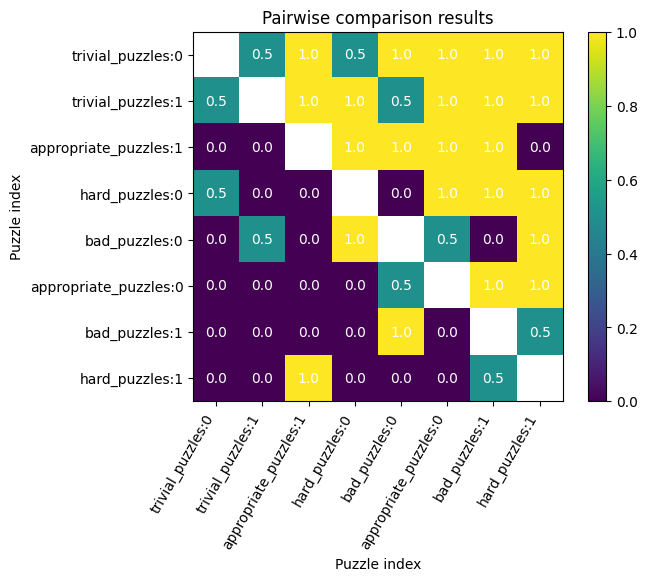

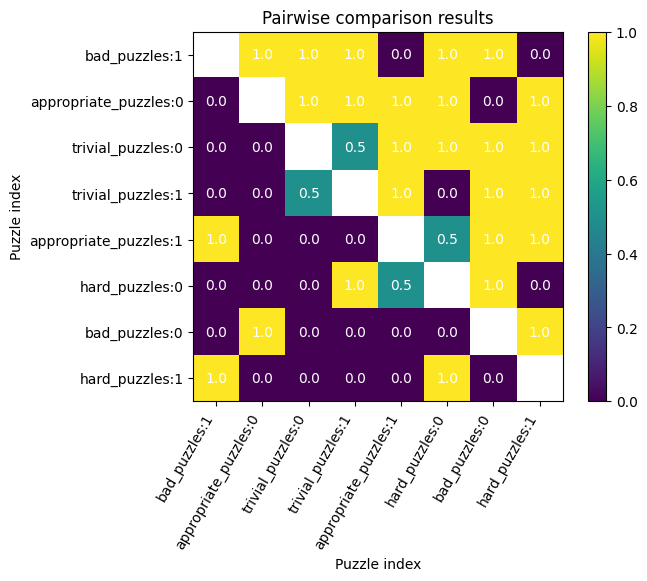

In [68]:
plot_pairwise_comparison_results(save_results)
plot_pairwise_comparison_results(save_results_inverse) # test position bias in the pairwise comparison

In [2]:
Rank=Auto_j_Rank(puzzle_dict,mode_rank="absolute",prompt_instruction=prompt_instruction,exllama2=True)
ranked_keys, grades = Rank.computing_ranking()

You passed `quantization_config` to `from_pretrained` but the model you're loading already has a `quantization_config` attribute and has already quantized weights. However, loading attributes (e.g. ['use_cuda_fp16', 'use_exllama', 'max_input_length', 'exllama_config', 'disable_exllama']) will be overwritten with the one you passed to `from_pretrained`. The rest will be ignored.
  0%|          | 0/28 [00:00<?, ?it/s]/home/flowers/miniconda3/envs/inference/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
  0%|          | 0/28 [00:27<?, ?it/s]


AttributeError: 'Auto_j_Rank' object has no attribute 'save_results_inverse'